## Install Required Packages

In [31]:
# Data Import and Manipulation
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Import online_shoppers_intention.csv Dataset and Exploration

In [3]:
df = pd.read_csv("online_shoppers_intention.csv")
list(df.columns)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Introduction of all the variables
1. **Administrative**: the number of pages of this type (administrative) that the user visited

2. **Administrative_Duration**: the amount of time spent in this category of pages

3. **Informational**: number of pages of this type (informational) that the user visited

4. **Informational_Duration**: the amount of time spent in this category of pages

5. **ProductRelated**: number of pages of this type (product related) that the user visited

6. **ProductRelated_Duration**: the amount of time spent in this category of pages

7. **BounceRates**: the percentage of visitors who enter the website through that page and exit without triggering any additional tasks

8. **ExitRates**: the percentage of pageviews on the website that end at that specific page 

9. **PageValues**: the average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction 

10. **SpecialDay**: this value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized 

11. **Month**: the month of the year in which the session occurred

12. **OperatingSystems**: the operating system used by the user

13. **Browser**: the browser used by the user

14. **Region**: the region from which the user is accessing the website

15. **TrafficType**: the type of traffic (e.g., direct, paid search, organic search, referral)

16. **VisitorType**: a categorization of users (e.g., Returning Visitor, New Visitor)

17. **Weekend**: a boolean indicating whether the session occurred on a weekend

18. **Revenue**: a binary variable indicating whether the session ended in a transaction (purchase)

### Information of the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Data Cleaning 
1. Remove missing value
2. Remove duplicate records

In [5]:
# to remove rows that contain any missing value
df_na = df.dropna()

# to remove duplicate records (rows)
df_nadu = df_na.drop_duplicates() 

In [6]:
df_nadu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType              12

In [7]:
# display all unique values in Month column
print(list(df_nadu["Month"].unique()))

# unify the month format and change other variable names
df_nadu.loc[df_nadu['Month'] == 'June', 'Month'] = 'Jun'
df_nadu.loc[df_nadu['Weekend'] == True, 'Weekend'] = "Weekend" 
df_nadu.loc[df_nadu['Weekend'] == False, 'Weekend'] = "Weekdays"

# create a month mapping dictionary
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# add a new column to the dataset as month_no
df_nadu["Month_No"] = df_nadu["Month"].map(month_map)

['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep', 'Dec']


/var/folders/hm/j8y944ps01vg4t05w06cd4d00000gn/T/ipykernel_70281/1554848089.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nadu["Month_No"] = df_nadu["Month"].map(month_map)


### Explore the Relationships and Correlations among Variables

In [8]:
# print(list(df.columns))
# select a set of variable that can be calculated in the correlation matrix
selected_variable = ['Administrative', 'Administrative_Duration', 
                      'Informational', 'Informational_Duration', 
                      'ProductRelated', 'ProductRelated_Duration', 
                      'BounceRates', 'ExitRates', 'PageValues', 
                      'SpecialDay', 'Browser', 'Region']
select_col = df_nadu[selected_variable]

correlation_matrix = select_col.corr()

#### display heatmap visualization for the correlation matrix

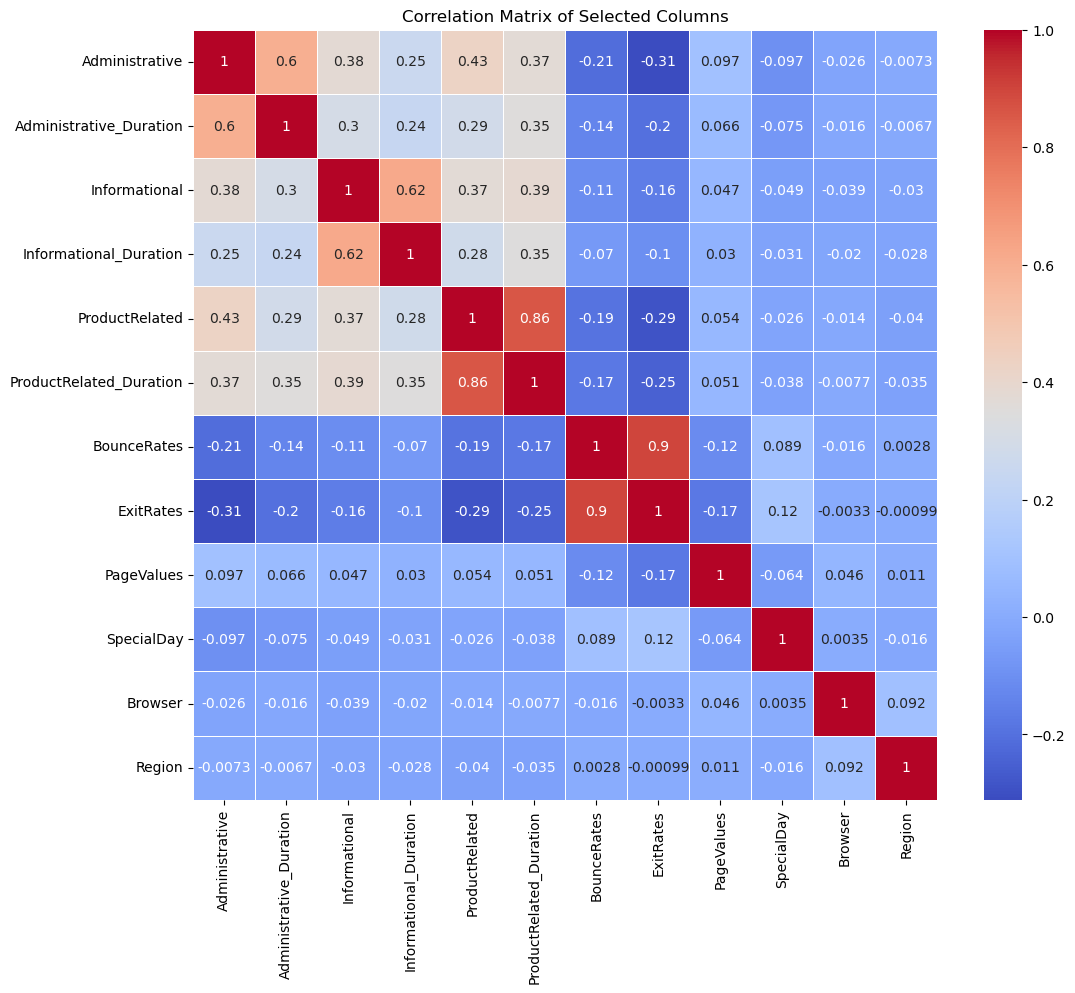

In [9]:
# display the heatmap for the correlation matrix
plt.figure(figsize = (12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix of Selected Columns')
plt.show()

/Users/liamli/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 12000x10000 with 0 Axes>

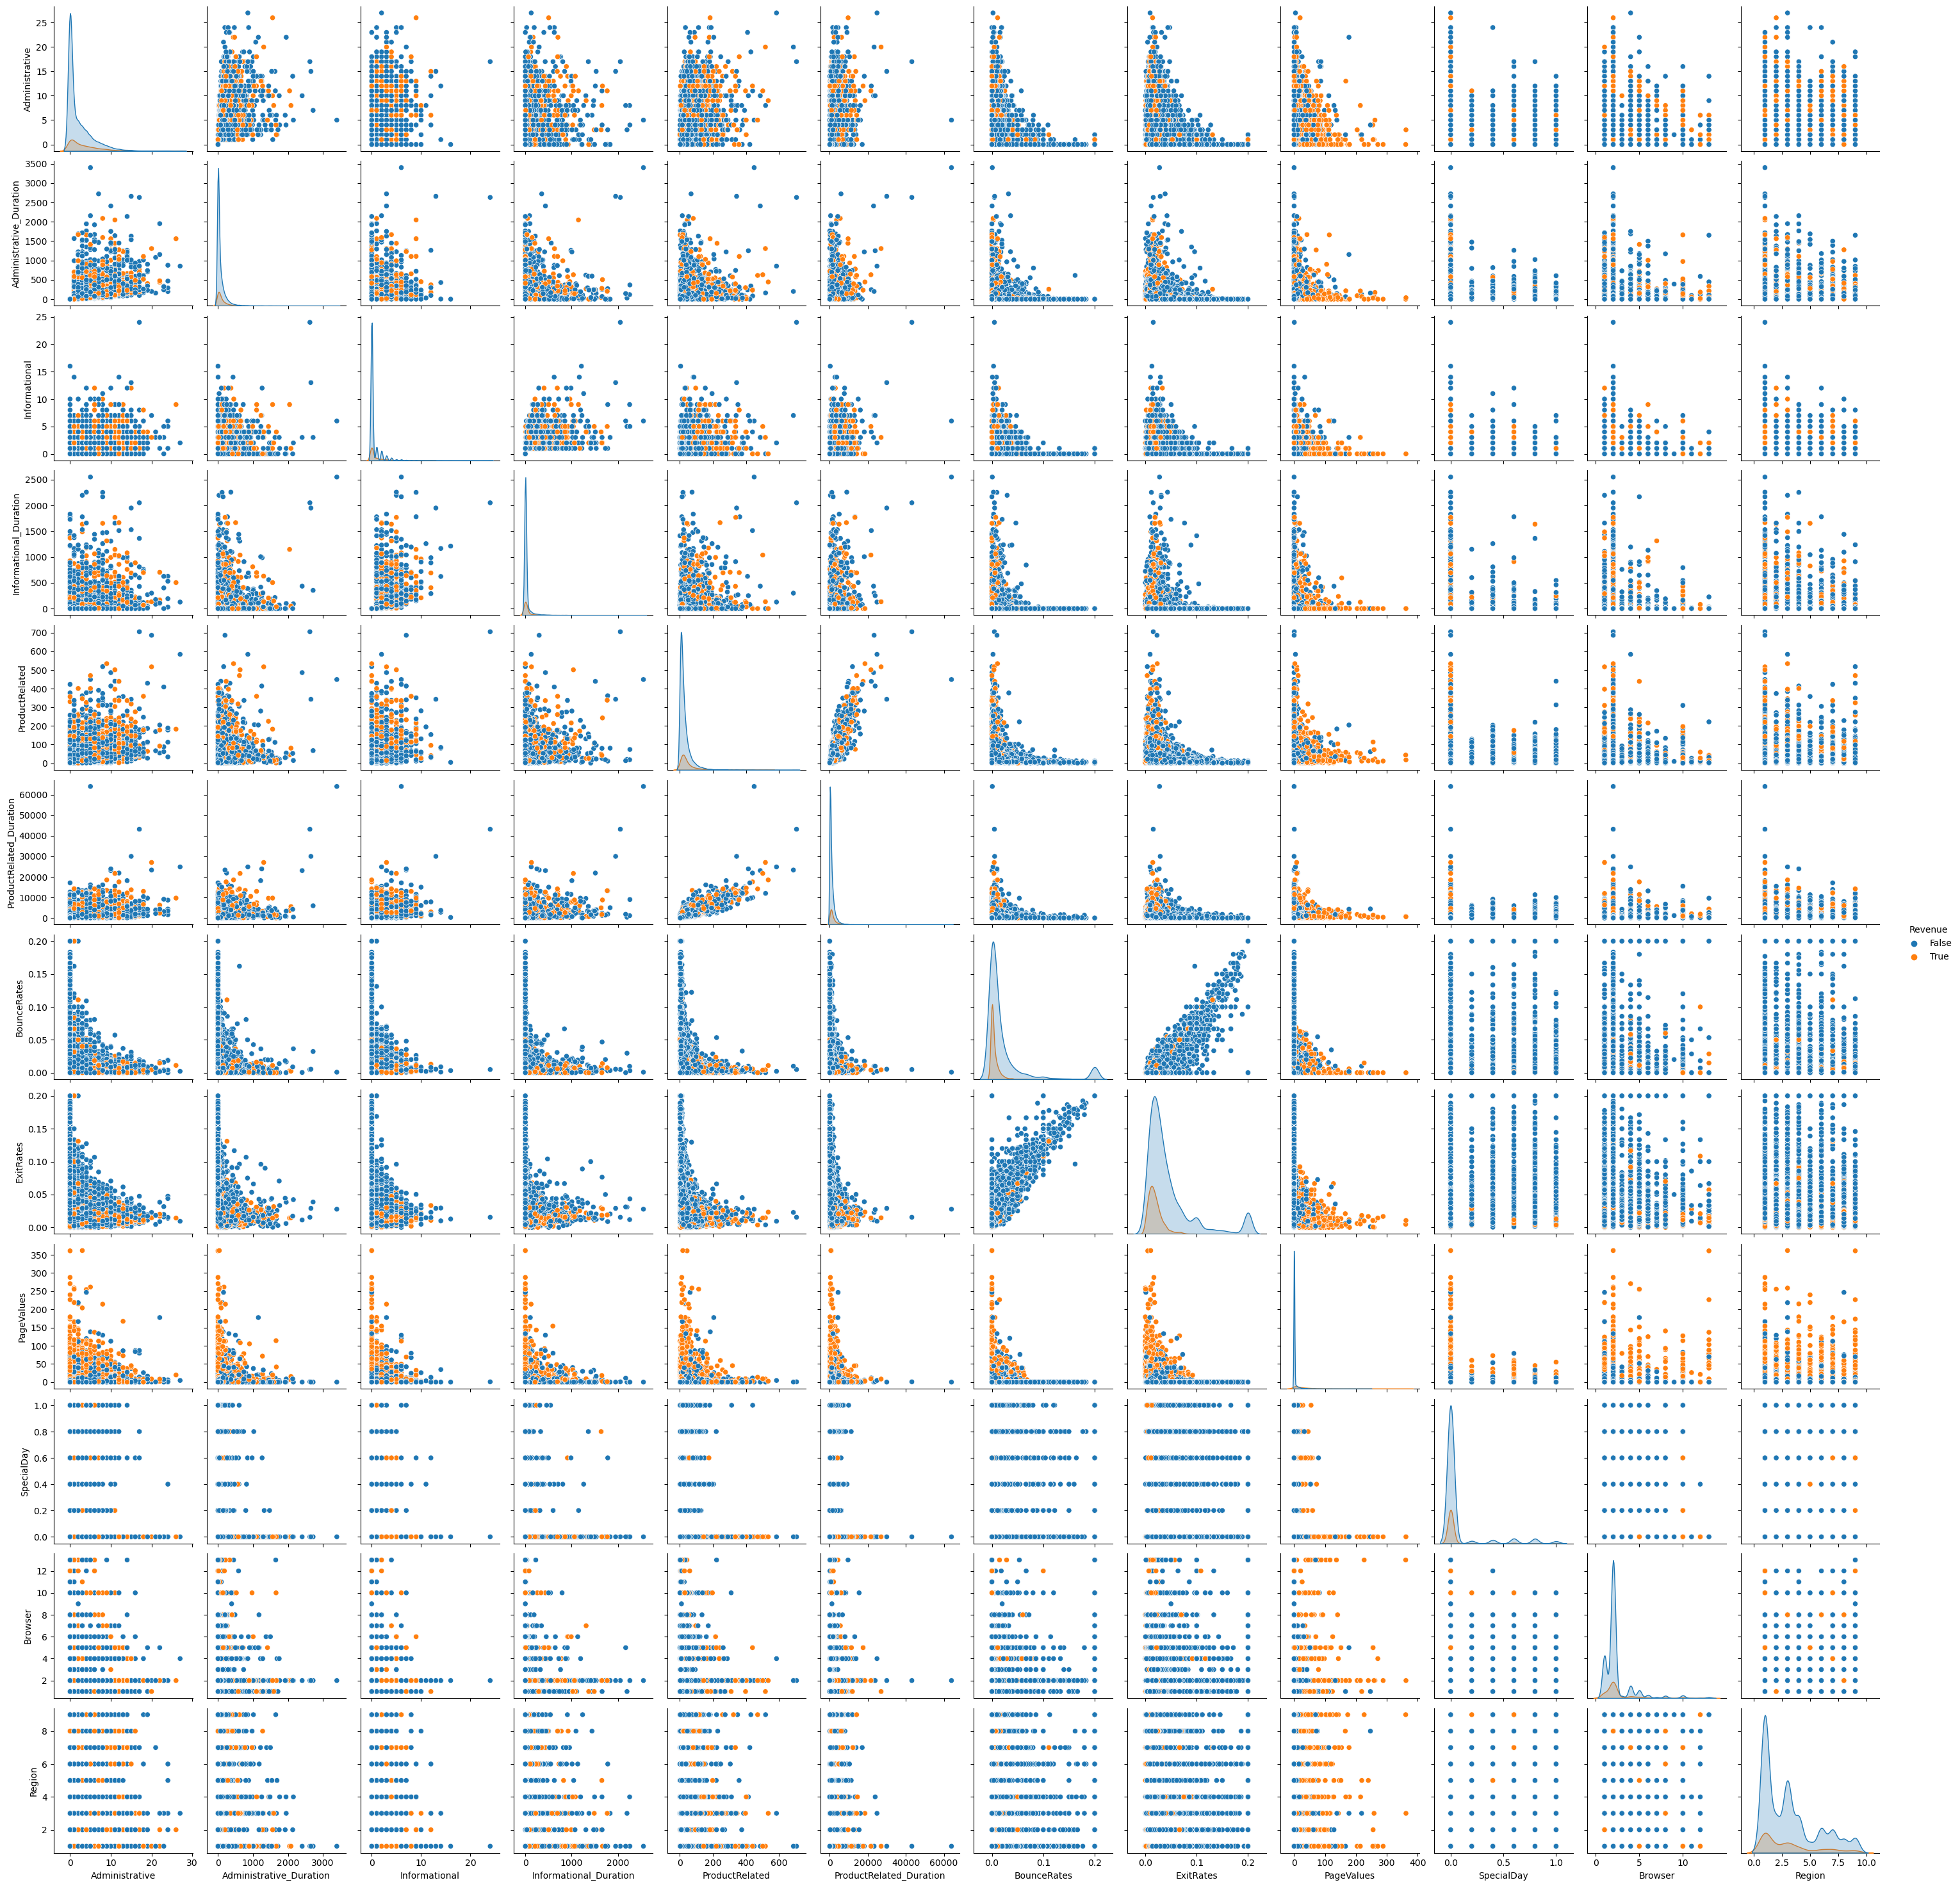

In [34]:
# display an overview of the relationships bettween variables using a pairplot with scatterplots
selected_variable1 = ['Administrative', 'Administrative_Duration', 
                      'Informational', 'Informational_Duration', 
                      'ProductRelated', 'ProductRelated_Duration', 
                      'BounceRates', 'ExitRates', 'PageValues', 
                      'SpecialDay', 'Browser', 'Region', 'Revenue']
select_col1 = df_nadu[selected_variable1]

plt.figure(figsize = (120, 100))
sns.pairplot(select_col1, hue = "Revenue", diag_kind = 'kde')
plt.show()

### Visualize variable relationships with Revenue (True & False)

##### Revenue Total Counts

Revenue
False    10297
True      1908
Name: count, dtype: int64


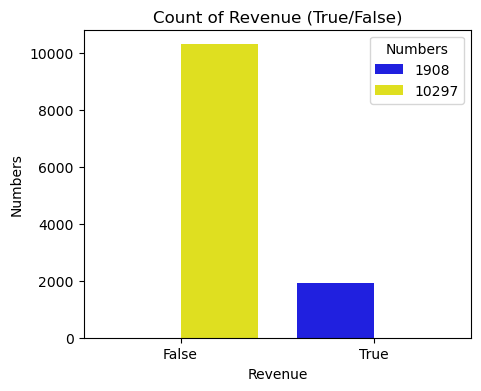

In [28]:
# Revenue Results
revenue_count = df_nadu["Revenue"].value_counts()
print(revenue_count)

df_revenue = revenue_count.reset_index()
df_revenue.columns = ['Revenue', 'Numbers']

# Visualize the Revenue results by bar chart
plt.figure(figsize = (5, 4))
sns.barplot(x = 'Revenue', y = 'Numbers', 
                  data = df_revenue, palette = ['blue', 'yellow'], 
                  hue = "Numbers")

plt.xlabel('Revenue')
plt.ylabel('Numbers')
plt.title('Count of Revenue (True/False)')

plt.show()


##### Revenue by Month

       False  True
Month             
Aug      357    76
Dec     1490   216
Feb      178     3
Jul      366    66
Jun      256    29
Mar     1668   192
May     2964   365
Nov     2222   760
Oct      434   115
Sep      362    86


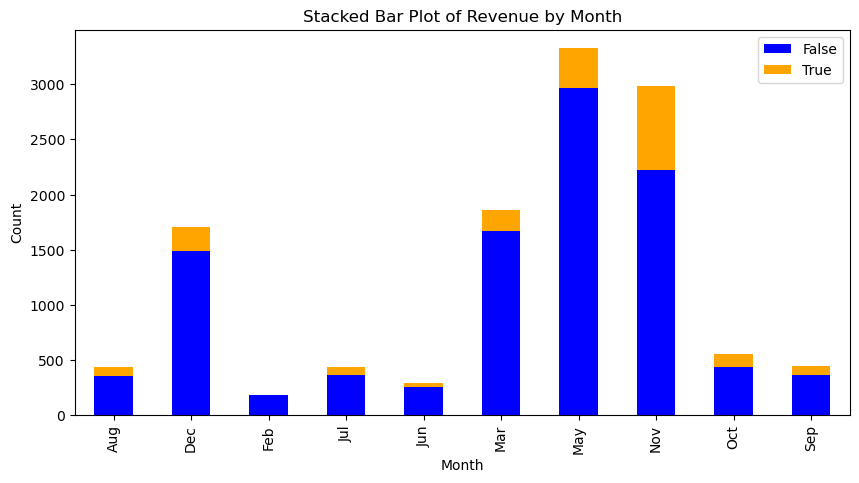

In [22]:
# sum up the count of true & false in revenue for each month
revenue_month = df_nadu.groupby('Month')['Revenue'].value_counts()

# create a dataframe
df_rm = revenue_month.reset_index()

# pivot df_rm
df_rm_p = df_rm.pivot(index = 'Month', columns='Revenue', values='count')
df_rm_p.columns = ['False', 'True']
print(df_rm_p)

# Create a barplot
df_rm_p.plot(kind = "bar", stacked = True, color = ['blue', 'orange'], figsize = (10, 5))

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Revenue by Month')

plt.show()

##### Revenue by Weekend and Distribution of Weekend and Weekdays Purchase Numbers

Weekend
Weekdays    9346
Weekend     2859
Name: count, dtype: int64


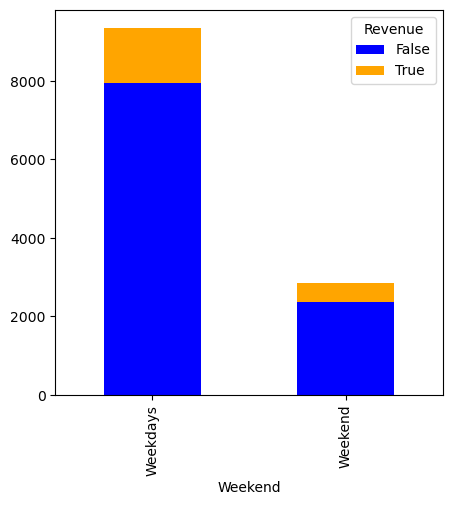

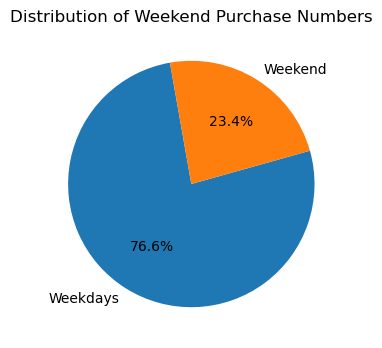

In [16]:
revenue_weekend = df_nadu.groupby('Weekend')['Revenue'].value_counts().unstack('Revenue')

revenue_weekend.plot(kind = "bar", stacked = True, color = ['blue', 'orange'], figsize = (5, 5))

"""Total Purchase in weekend and weekdays"""
# display the purchasing time
weekend_count = df_nadu["Weekend"].value_counts()
print(weekend_count) 

df_weekend = weekend_count.reset_index()
df_weekend.columns = ['Weekend', 'Numbers']

# Visualize the weekend results by pie chart
plt.figure(figsize = (4, 4))
plt.pie(df_weekend["Numbers"], labels = df_weekend["Weekend"], 
        autopct='%1.1f%%', startangle = 100)
plt.title("Distribution of Weekend Purchase Numbers")
plt.show()

Revenue           False  True 
OperatingSystems              
1                  2170    379
2                  5386   1155
3                  2262    268
4                   393     85
5                     5      1
6                    17      2
7                     6      1
8                    58     17


<Axes: xlabel='OperatingSystems'>

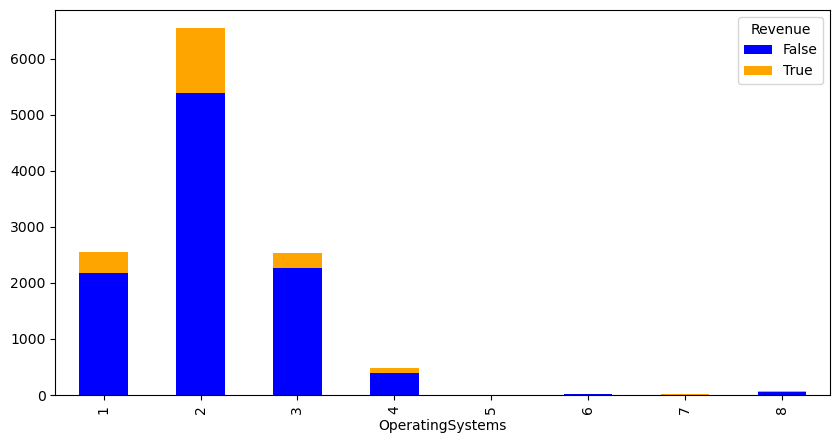

In [26]:
ops = df_nadu.groupby("OperatingSystems")["Revenue"].value_counts()

df_ops = ops.reset_index()
df_ops_p = df_ops.pivot(index = 'OperatingSystems', 
                        columns = 'Revenue', values = 'count')
print(df_ops_p)

df_ops_p.plot(kind = "bar", stacked = True, color = ['blue', 'orange'], figsize = (10, 5))